## Notes: 

If you don't have graphviz installed: 

For Mac, run `brew install graphviz` in your terminal.
For Windows/Linuz, run `pip install graphviz` in your terminal. 

In [39]:
!pip install graphviz

You are using pip version 8.1.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [40]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import graphviz
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint

In [41]:
np.random.seed(0)

# Decision Trees

This notebook will walk through how to use decision trees with bagging and boosting methods in sklearn as well as introduce the bias variance tradeoff.

First load the iris dataset into a pandas dataframe.

In [42]:
iris = load_iris()
from sklearn.datasets import load_iris
df  = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We will then add the species label to each datapoint using the encoding given in the dataset to understand what the overall dataset looks like.

In [43]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Split the dataframe into training and validation data.

In [60]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
train = train.drop(['is_train'], axis = 1)
test = test.drop(['is_train'], axis = 1)

Separate the labels and feature from both the training and test datasets and refactorize the labels.

In [62]:

from sklearn.model_selection import train_test_split
x = df.drop("species", axis=1)
y = df["species"]
x_train, x_test, y_train, y_test = train[train.columns[0:4]], test[test.columns[0:4]],train[train.columns[4:]], test[test.columns[4:]]
print(x_train)
train_features = x_train
train_labels = y_train
test_features = x_test
test_labels = y


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
5                  5.4               3.9                1.7               0.4
7                  5.0               3.4                1.5               0.2
10                 5.4               3.7                1.5               0.2
11                 4.8               3.4                1.6               0.2
12                 4.8               3.0                1.4               0.1
13                 4.3               3.0                1.1               0.1
14                 5.8               4.0                1.2     

Create a basic decision tree which minimizes entropy and fit it to the training data.

In [64]:
# create decision tree that minimizes entropy 
# CODE 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)

#fit on to training data
# CODE

We can visualize this decision tree by using graphviz. Visualizing a decision tree allows us to easily interpret how the predictions or classifications are made because each split is clearly defined.

Notice how with each split the weighted entropy of the two branches is less than the entropy of the parent.


In [65]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

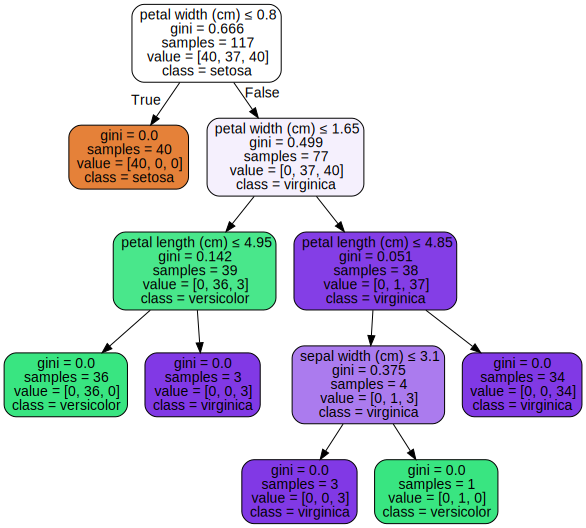

In [66]:
graph = graphviz.Source(dot_data) 
graph

Compute the training and validation accuracies. 

In [67]:
# compute training accuracy using score
# CODE
from sklearn import metrics

In [31]:
# compute validation accuracy using score
# CODE
metrics.accuracy_score(y_test, y_pred)

0.96666666666666667

We will now use Grid Search to find a good set of hyperparameters which attempt to regualize the tree.

In [72]:
parameters = {"min_samples_split": [2, 10],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }
# use GridSearchCV
# CODE HERE
from sklearn.grid_search import GridSearchCV

grid = GridSearchCV(dtree, parameters, cv=10, scoring='accuracy')
grid.fit(iris.data, iris.target)


# fit gridsearch on training data and labels
# CODE HERE

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [None, 5, 10, 20], 'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [73]:
# get best decision tree from gridsearch
best_tree = print(grid.best_score_)

# fit best decision on training data and labels
print(grid.best_score_)

0.9666666666666667
0.9666666666666667


Run the following code to visualize the new tree.

In [75]:
dot_data = tree.export_graphviz(best_tree, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph

TypeError: None is not an estimator instance.

You should see that the difference between the validation and training accuracies is not as large as before.

In [21]:
# use score to get best tree training accuracy
# CODE 

In [22]:
# use score to get best tree validation accuracy
# CODE 

Now train a Random Forest Classifier on the same dataset. 

In [23]:
# RandomForestClassifier minimizing entropy. set estimators to 100
# CODE 

# fit classifier on training data 
# CODE 

In [24]:
# use score to get training accuracy
# CODE 

In [25]:
# use score to get validation accuracy
# CODE 

Train an AdaBoost Classifier on the same dataset. 

In [26]:
default_tree = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, criterion = 'entropy')

In [27]:
# initialize AdaBoostClassifier based on default tree
# CODE 

In [28]:
# fit boost classifier on training data
# CODE 

In [29]:
# use score to get boost training accuracy
# CODE 

In [30]:
# use score to get boost validation accuracy
# CODE 

## Questions: 

1) In your own words, explain what a decision tree is.
    
    Answer here.
    
2) What does it mean to regularize a decision tree?

    Answer here.
    
3) What are some ways you can regularize a decision tree?
    
    Answer here.

4) Why do decision trees get higher training accuracy than testing accuracy?

    Answer here.

5) Why are the testing and training accuracy not so different from each other when we find the best decision tree (`best_tree`)?

    Answer here.


6) In your own words, explain how a random forest works and how regularization works in random forests.

    Answer here.


7) Explain in your own words and in detail what GridSearchCV does.
    
    Answer here.


8) What does boosting do and why is it useful? Connect this back to what we did with the iris dataset. 

    Answer here.
